![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [2]:
#En esta parte solamente importamos las librerias pandas y numpy para poder empezar a trabajar
import numpy as np
import pandas as pd

#Solamente leemos el dataframe 
df = pd.read_csv('ML_cars.csv',sep=',')

#con el df.info() vamos a ver de que tipos son los datos con que vamos a trabajar y
#también vamos a ver cuantos nulos pueden llegar a existir en estas tablas.

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [3]:
#Elimino las columnas carlength,carwidth y carheight porque considero que a la hora de trabajar no me parecen
#realmente necesario saber el largo,ancho y peso del auto (en este tipo de investigación), al igual que 
#enginelocation (ubicación del motor) y drivewheel (ubicación del volante)
# Carname porque realmente vamos a utilizar la mediana de los precios como parámetros además de que nos interesa más 
#las características de los autos que los nombres de la marca en si.
df.drop(columns=['carlength','carwidth','carheight','CarName'],inplace=True)
df.drop(columns=['enginelocation','drivewheel'],inplace=True)
#Elimino tambien fueltype ya que tengo la columna que es enginetype que tambien me indica 

#Además,eliminamos varias columnas que eran de tipo object (por lo cual dificulta el trabajo)
#pero las que quedan la vamos a parsear con one-hot encoding


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   curbweight        205 non-null    int64  
 8   enginetype        205 non-null    object 
 9   cylindernumber    205 non-null    object 
 10  enginesize        205 non-null    int64  
 11  fuelsystem        205 non-null    object 
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

In [5]:
#Luego de hacer este output, lo que podemos observar es que según este dataset no hay nulos (205 entradas y todos con valores non-null)
# Pero hay demasiadas columnas que son de tipo object; lo que voy a plantear es realizar un one hot-encoding. Estos lo vamos a realizar
# con la función get_dummies de pandas

df_nuevo= pd.get_dummies(df)

df_nuevo.set_index('car_ID',inplace=True)



In [76]:
# En caso de no tener instalado la librería Missigno, usted debe instalarlo con el comando
# pip install missingno

<Axes: >

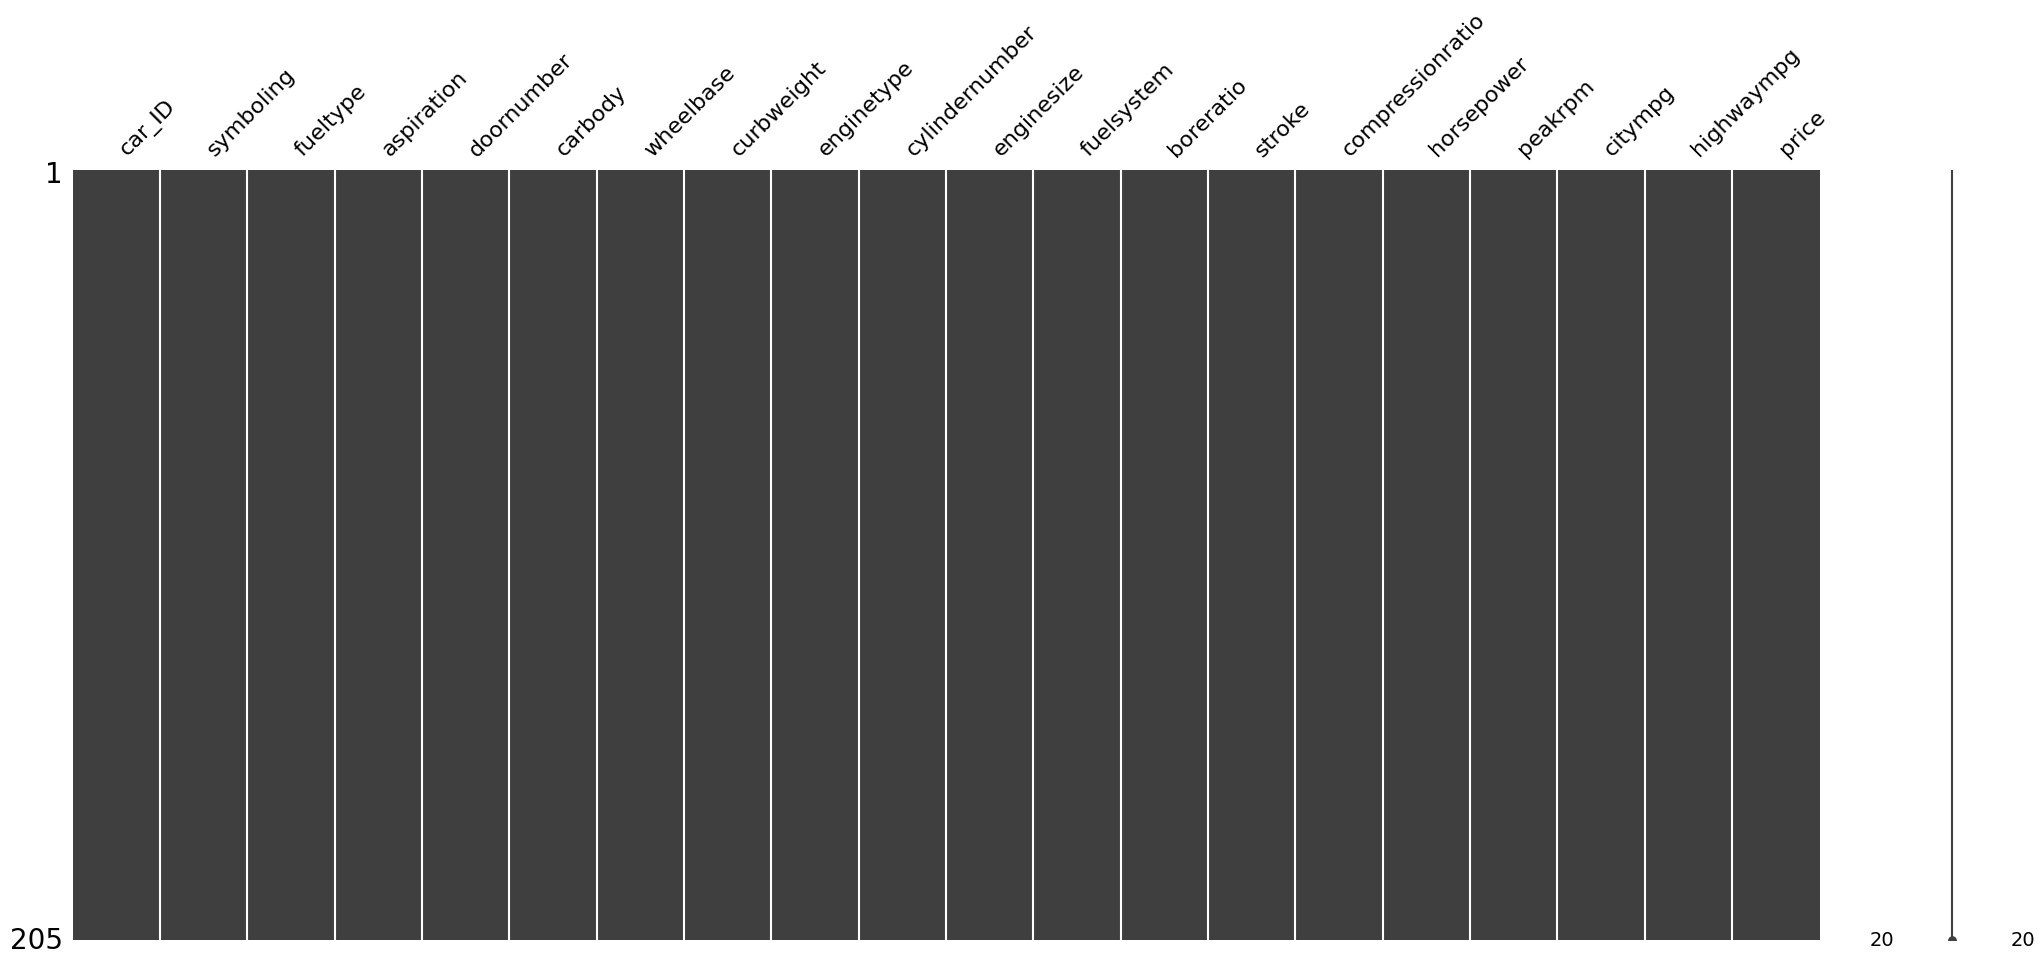

In [77]:
# En mi caso a mi me gusta usar la libreria Missigno ya que me permite ver de manera gráfica
# la cantidad de nulos que existen en cada tabla.

import missingno as msno
%matplotlib inline
msno.matrix(df)

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

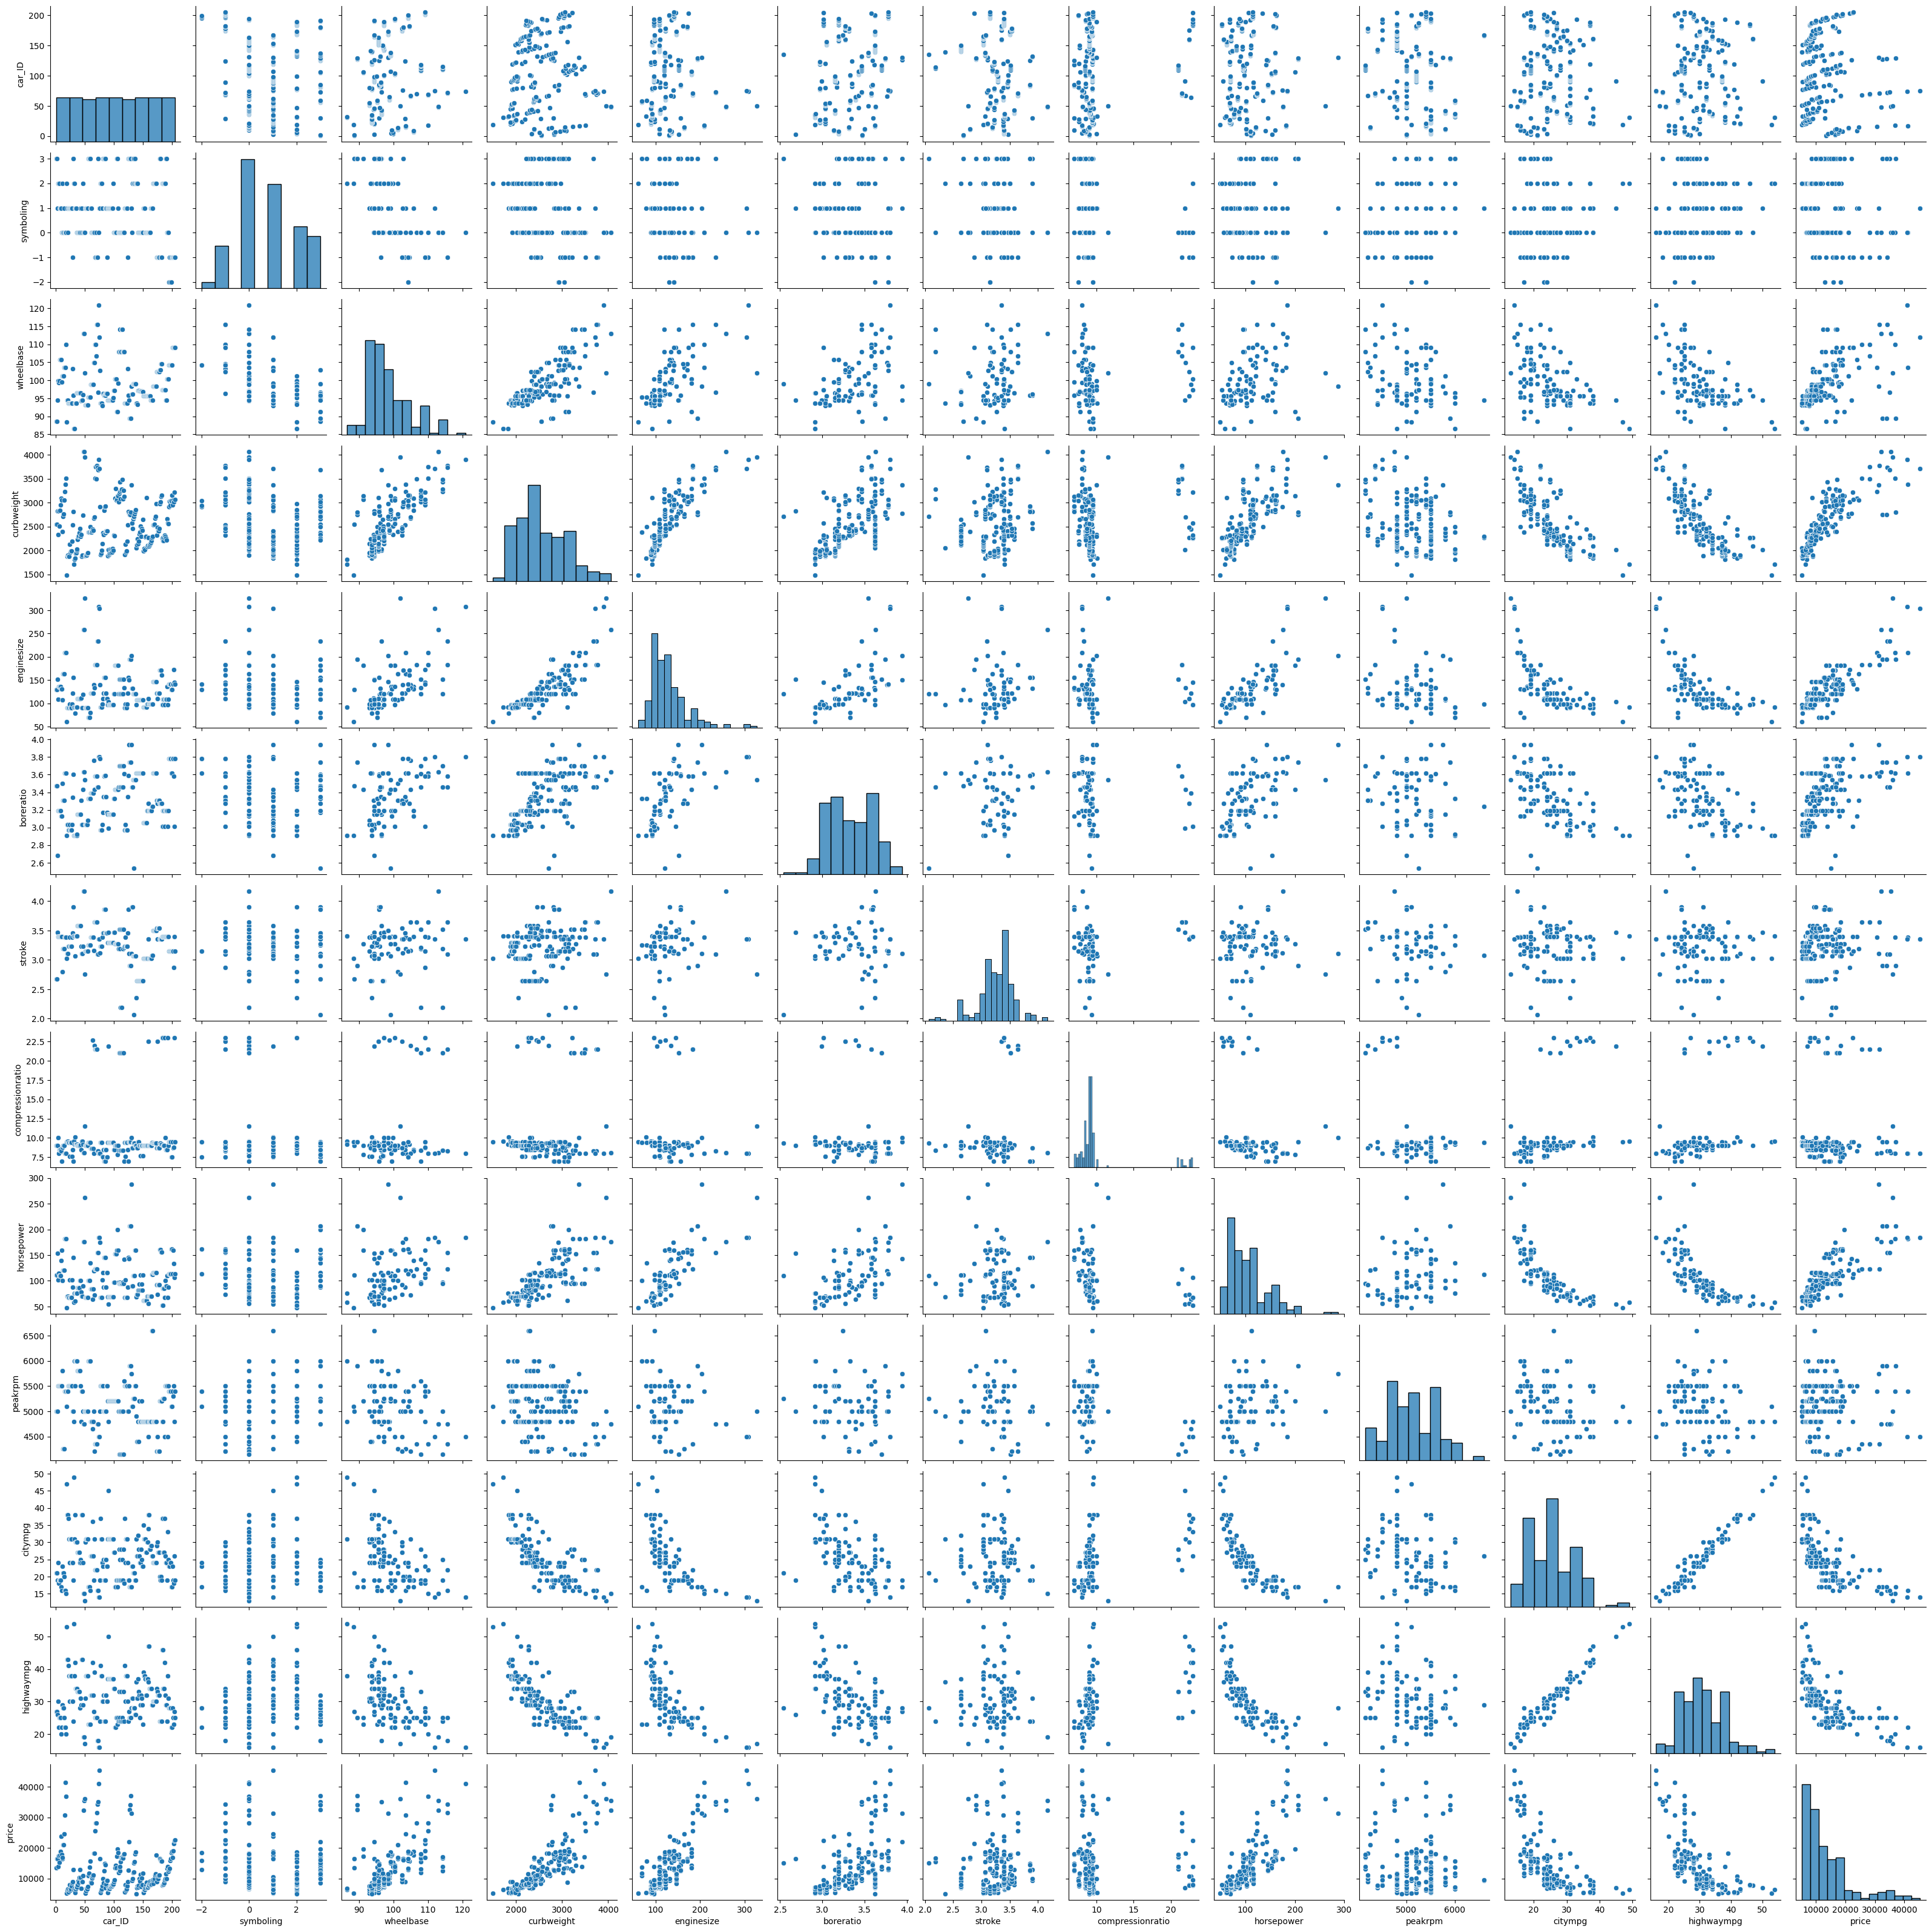

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Obtener una lista de las columnas numéricas estándar (enteros y flotantes)
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Seleccionar solo las columnas numéricas estándar
columnas_numericas_estandar = df[columnas_numericas]

# Con la creación de este pairplot vemos como un vistazo general de las correlaciones de las columnas.
sns.pairplot(columnas_numericas_estandar)
plt.show()


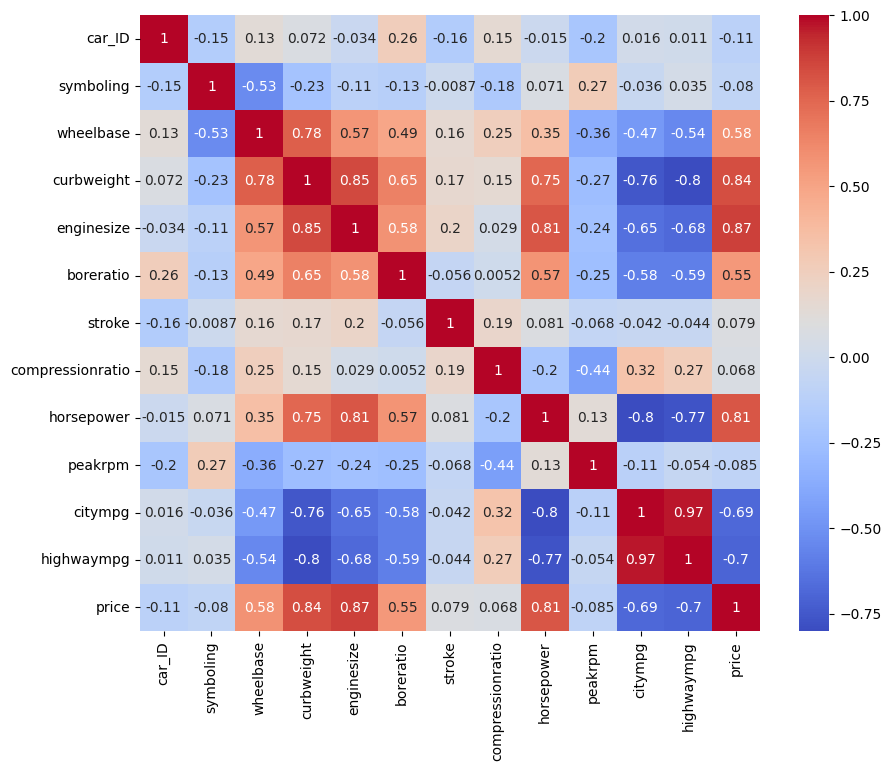

In [7]:

#Y con este paso vemos de manera más clara la correlacción existente que puede llegar a existir entre las columnas
# Calcular la matriz de correlación
correlation_matrix = columnas_numericas_estandar.corr()

# Crear un heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


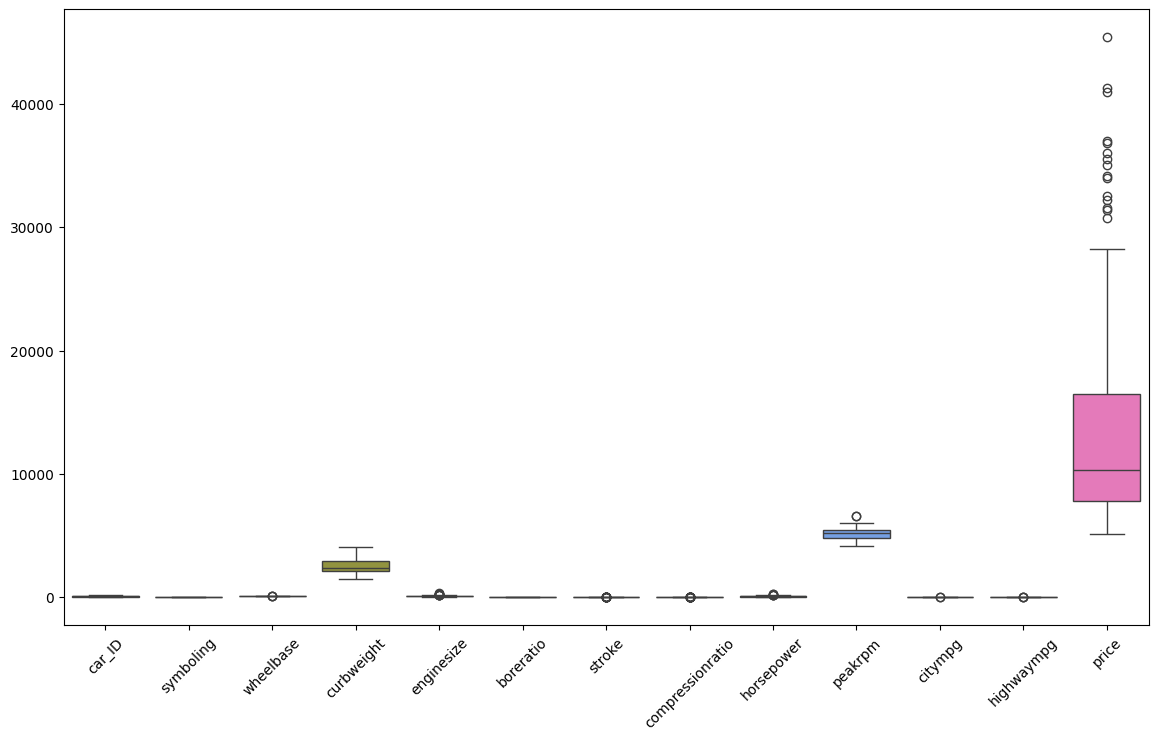

In [8]:
#Ahora vamos a realizar un boxplot para ver realemente los outliers existentes

plt.figure(figsize=(14,8))
sns.boxplot(data=columnas_numericas_estandar)
plt.xticks(rotation=45)
plt.show()

#Al encontrarnos con una visión general, vamos a proceder a mirar fijamente la columna price ya que es la que mayor outliers presenta

#Otra observación de las demas columnas es que hay pocos outliers y que los datos están super concentrados

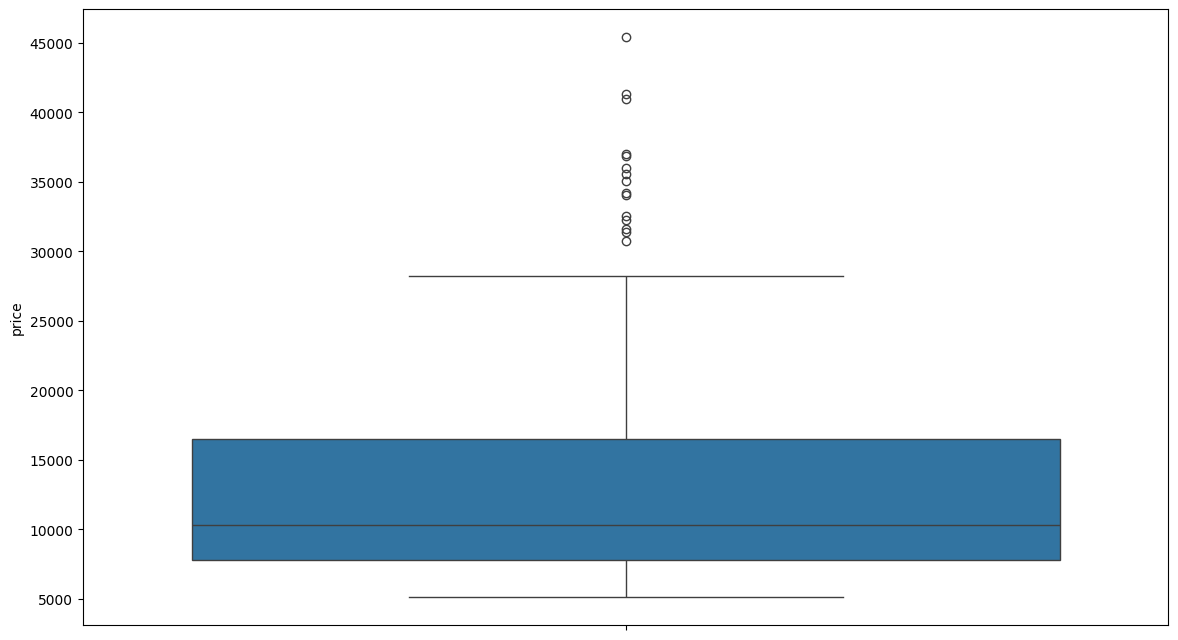

In [9]:
plt.figure(figsize=(14,8))
sns.boxplot(data=columnas_numericas_estandar['price'])
plt.xticks(rotation=45)
plt.show()


Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [ ]:
#Yo considero que en este caso me parece totalemente necesario imputar con la mediana porque considero
#más que necesario hacerlo debido a que la cantidad de datos no es muy extensa y eso puede llegar a dañar
#nuestro modelo.

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [10]:
#Lo que realizo aqui es verificar que no tenga errores las columnas a las que les realice one-hot encoding ya que 
#me estaba dando muchos problemas a la hora de graficarlos.s

# Verificar si hay alguna columna categórica que contenga solo valores False
for col in df_nuevo.columns:
    if df_nuevo[col].dtype == 'bool':
        if not df_nuevo[col].any():
            print(f"La columna {col} contiene solo valores False.")

# Inspeccionar las primeras filas del DataFrame df_nuevo
print(df_nuevo.head())




        symboling  wheelbase  curbweight  enginesize  boreratio  stroke  \
car_ID                                                                    
1               3       88.6        2548         130       3.47    2.68   
2               3       88.6        2548         130       3.47    2.68   
3               1       94.5        2823         152       2.68    3.47   
4               2       99.8        2337         109       3.19    3.40   
5               2       99.4        2824         136       3.19    3.40   

        compressionratio  horsepower  peakrpm  citympg  ...  \
car_ID                                                  ...   
1                    9.0         111     5000       21  ...   
2                    9.0         111     5000       21  ...   
3                    9.0         154     5000       19  ...   
4                   10.0         102     5500       24  ...   
5                    8.0         115     5500       18  ...   

        cylindernumber_twelve  c

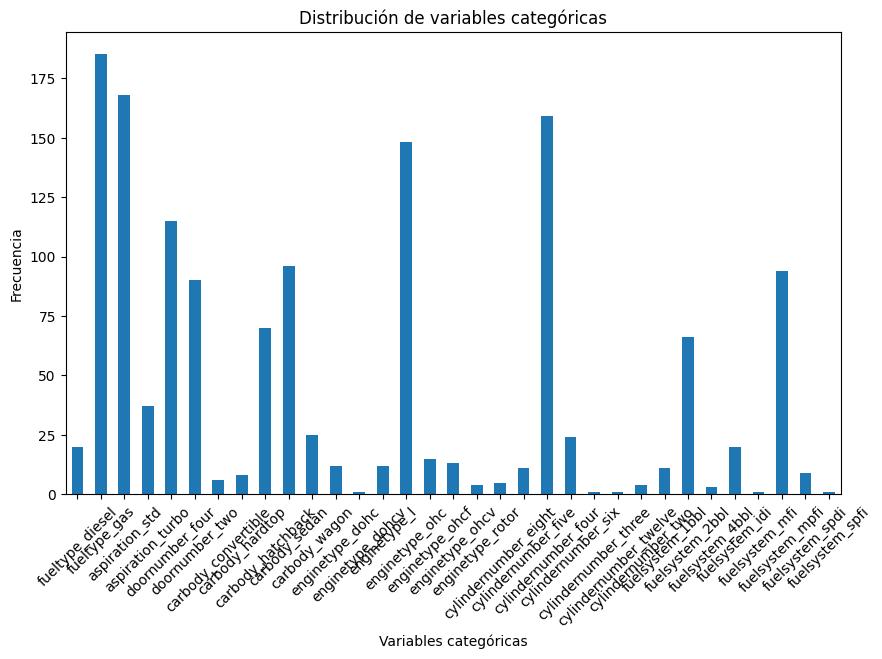

In [11]:
# Obtener todas las columnas que son categóricas (resultado del one-hot encoding)
columnas_categoricas = df_nuevo.select_dtypes(include='bool').columns

# Verificar que haya al menos una columna categórica
if len(columnas_categoricas) > 0:
    # Obtener las sumas de las frecuencias de las categorías en todas las columnas categóricas
    total_counts = df_nuevo[columnas_categoricas].sum()
    
    # Crear un gráfico de barras para la distribución de frecuencias combinadas de todas las variables categóricas
    plt.figure(figsize=(10, 6))
    total_counts.plot(kind='bar')
    plt.title('Distribución de variables categóricas')
    plt.xlabel('Variables categóricas')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
    plt.show()
else:
    print("No se encontraron columnas categóricas en el DataFrame.")


Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [19]:
#La función winsorize toma como argumentos la columna que se va a transformar
# y los límites que se utilizarán para recortar los valores atípicos. 
#Aquí, se recortan los valores atípicos en el 5% tanto desde la parte inferior como desde la superior

from scipy.stats.mstats import winsorize

# Hacemos una copia del DataFrame para evitar modificar el original
df_nuevo_outliers = df_nuevo.copy()  

# Aplicar la Winsorización solo a la columna 'price'
df_nuevo_outliers['price'] = winsorize(df_nuevo_outliers['price'], limits=[0.05, 0.05])

# Ahora df_nuevo_outliers contiene la columna 'price' con outliers tratados mediante Winsorización



In [20]:
df_nuevo_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   curbweight             205 non-null    int64  
 3   enginesize             205 non-null    int64  
 4   boreratio              205 non-null    float64
 5   stroke                 205 non-null    float64
 6   compressionratio       205 non-null    float64
 7   horsepower             205 non-null    int64  
 8   peakrpm                205 non-null    int64  
 9   citympg                205 non-null    int64  
 10  highwaympg             205 non-null    int64  
 11  price                  205 non-null    float64
 12  fueltype_diesel        205 non-null    bool   
 13  fueltype_gas           205 non-null    bool   
 14  aspiration_std         205 non-null    bool   
 15  aspiration_

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [ ]:
#La normalización es un proceso utilizado para estandarizar la escala de las características en un conjunto de datos.
# Esto es importante cuando las características tienen diferentes escalas o rangos de valores,
# ya que algunos algoritmos de aprendizaje automático pueden verse afectados negativamente por estas diferencias.




In [21]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
numeric_columns = df_nuevo_outliers.select_dtypes(include=['int64', 'float64']).columns

# Instanciar el objeto StandardScaler
scaler = StandardScaler()

# Normalizar las columnas numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [23]:
# Suponiendo que ya tienes df_numeric y columnas_categoricas definidos

# Obtener DataFrame de las columnas categóricas de df_nuevo
df_categorico = df_nuevo[columnas_categoricas]

# Concatenar df_numeric y df_categorico a lo largo del eje de las columnas (axis=1)
df_completo = pd.concat([df[numeric_columns], df_categorico], axis=1)


<Axes: >

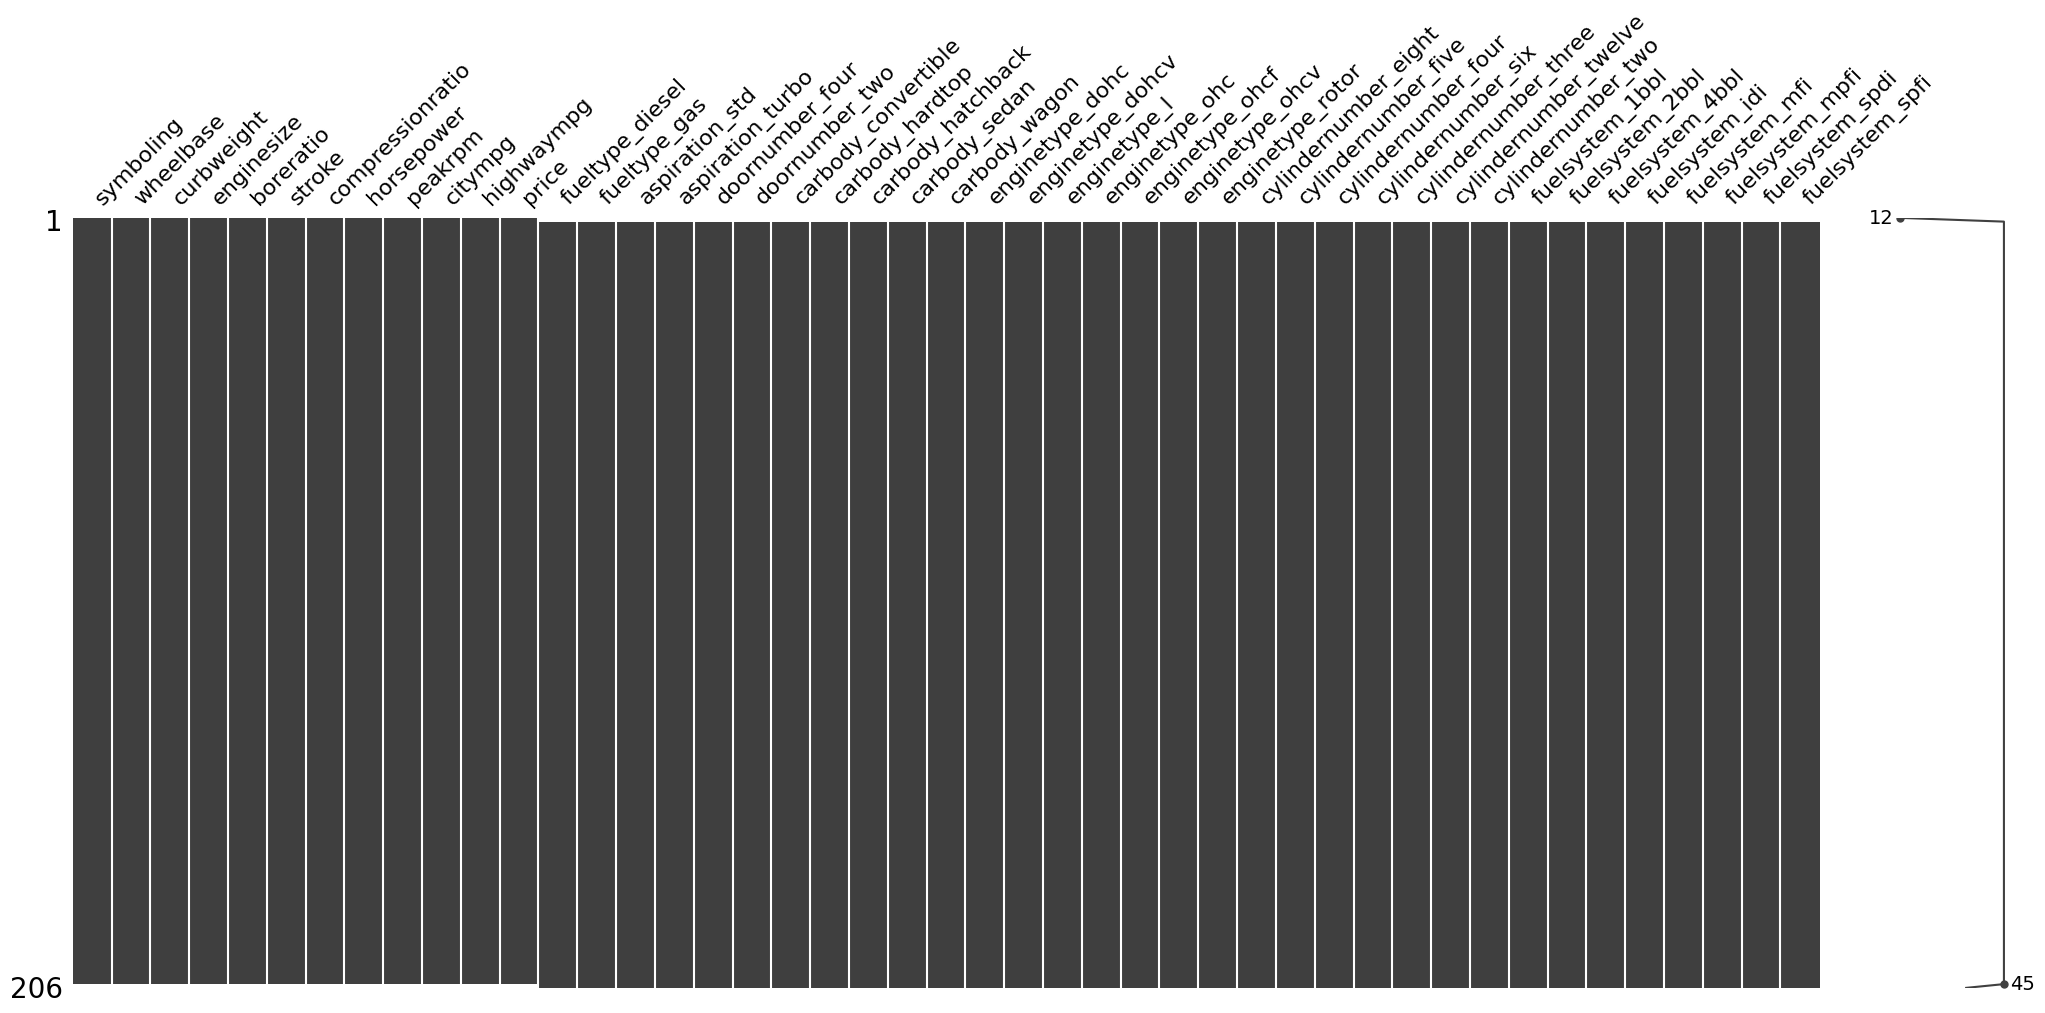

In [25]:

import missingno as msno
%matplotlib inline
msno.matrix(df_completo)

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [24]:
df_completo.to_csv('autos_exportados2.csv',index=False)